In [1]:
#importing important library
import numpy as np
import pandas as pd
import seaborn as sns 
from textblob import TextBlob

# Importing the Dataset

In [3]:
data1=pd.read_excel("Data Analyst - Test Data.xlsx")
df=data1
df

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [4]:
#Displaying the top 5 rows of the data
df.head(5)

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [5]:
#Displaying the last 5 rows of data
df.tail(5)

,Review,date,Location
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America
6447,"·staff, free coffee, location and activities.\...",2019-07-10,United States of America


In [6]:
#Columns present in our data
df.columns

Index(['Review', 'date', 'Location'], dtype='object')

In [7]:
#Analyzing the data using describe()
df.describe()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7532\3674626617.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Review,date,Location
count,6393,6448,1711
unique,6384,385,1082
top,Amazing\n \n Read more\n Read less,2019-06-01 00:00:00,United States of America
freq,4,150,116
first,NaN,2018-08-01 00:00:00,NaN
last,NaN,2019-08-20 00:00:00,NaN


In [8]:
#Checking the shape of the data
df.shape

(6448, 3)

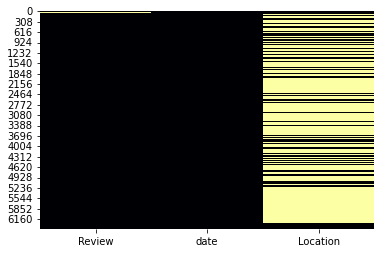

In [9]:
sns.heatmap(df.isnull(),cbar=False,cmap='inferno');

In [10]:
#Finding the sum of null present in each column by using isnull()
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

From the graph and from the isnull() it is evident that Review have 55 null and Location has 4737 Null 

In [11]:
#removing the null value from the data and resetting the index
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [12]:
#Removing the Index column
df=df.drop(['index'],inplace=False,axis=1)

In [13]:
#Checking the duplicates of data and removing it 
df.drop_duplicates()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
4,Very clean and friendly and I love the locatio...,2019-08-19,California
...,...,...,...
1700,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
1701,·the internet barely worked or didn't work,2019-07-12,United States of America
1702,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
1703,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [14]:
#Checking the Unique value
df.nunique()

Review      1705
date         363
Location    1078
dtype: int64

# Looking for Non ASCII lines in reviews

In [15]:
NON_ASCII = [a.isascii() for a in df.Review]
NON_ASCII = pd.Series(NON_ASCII)
df[NON_ASCII == False]

,Review,date,Location
4,Very clean and friendly and I love the locatio...,2019-08-19,California
7,En general excelente. Fantástica situación\n D...,2019-08-17,España
8,Les chambres familiales sont pratiques (nous é...,2019-08-17,Montréal
11,propreté impeccable. chambre refaite tous les ...,2019-08-15,savasse France
15,Vétuste mérite un sacré rafraîchissement \n Em...,2019-08-14,Toulon
...,...,...,...
1700,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
1701,·the internet barely worked or didn't work,2019-07-12,United States of America
1702,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
1703,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [16]:
NON_ASCII.value_counts()

True     1205
False     500
dtype: int64

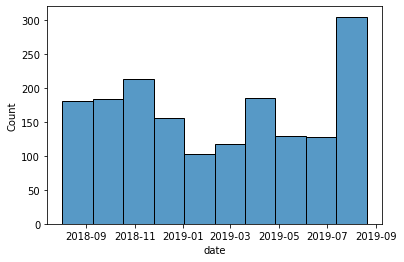

In [17]:
sns.histplot(df.date,bins=10);

# some conclusions

In [18]:
df['Location'].value_counts(sort=True,ascending=False)

United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
                           ... 
State College, PA             1
Los ángeles , us              1
Stroudsburg Pa US             1
Birmingham, al                1
Trinidad and Tobago           1
Name: Location, Length: 1078, dtype: int64

The above data shows the most number of reviews are from United States of America and least number of reviews are from middletown, ny    

In [19]:
df['date'].value_counts(sort=True)

2018-09-04    18
2019-07-31    17
2019-08-11    16
2018-11-26    15
2018-10-26    14
              ..
2019-03-16     1
2019-04-10     1
2018-08-31     1
2018-08-30     1
2019-08-02     1
Name: date, Length: 363, dtype: int64

from the above data it is shows that most reviews are given on 2018-09-04 and least reviews are given on 2018-12-21 

# Testing sentiment of reviews using TextBlob

In [20]:
TextBlob("The food was amazing").sentiment

Sentiment(polarity=0.6000000000000001, subjectivity=0.9)

In [21]:
polarity = []

subjectivity = []

for i in df['Review'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    except:
        polarity.append(0)
        subjectivity.append(0)

In [22]:
df['polarity'] = polarity
df['subjectivity'] = subjectivity
df.head()

,Review,date,Location,polarity,subjectivity
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,0.437037,0.553333
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,0.229167,0.489583
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,0.293939,0.367576
3,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,0.336565,0.454082
4,Very clean and friendly and I love the locatio...,2019-08-19,California,0.224750,0.497667


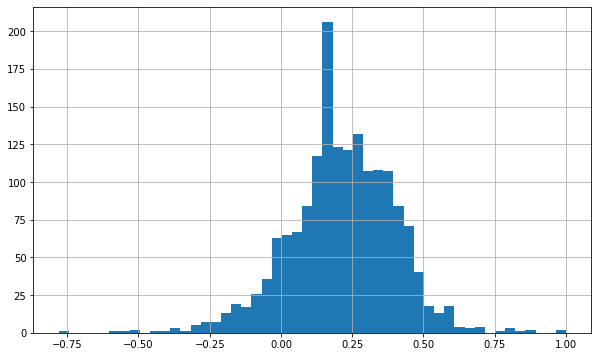

In [23]:
#Distribution of Polarity
df.polarity.hist(bins=50, figsize = (10,6));
